In [1]:
# pip install numpy pandas sklearn

In [2]:
    import numpy as np
    import pandas as pd
    import itertools
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    import matplotlib.pyplot as plt

In [3]:
    #Read the data
    df=pd.read_csv('news.csv')
    #Get shape and head
    df.shape
    df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df=df.set_index("Unnamed: 0")

In [5]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [7]:
# Checking if the data set contains any null values
df[df.isnull().any(axis=1)].count()

title    0
text     0
label    0
dtype: int64

In [8]:
    # Geting the labels
    labels=df.label
    labels.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [9]:
    #Spliting the dataset
    x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#  initializing a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded) And fit the model.

In [10]:
    # Initializing a TfidfVectorizer
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
    # Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
    tfidf_test=tfidf_vectorizer.transform(x_test)

# intializing a PassiveAggressiveClassifier, predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [11]:
    # Initializing a PassiveAggressiveClassifier
    pac=PassiveAggressiveClassifier(max_iter=50)
    pac.fit(tfidf_train,y_train)
    # Predicting on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    print(f'Accuracy: {round(score*100,2)}%')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 92.58%


# confusion matrix to gain insight into the number of false and true negatives and positives. It shows that we have 591 true positives, 586 true negatives, 43 false positives, and 47 false negatives.

In [12]:
    # Building confusion matrix
    confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[586,  52],
       [ 42, 587]], dtype=int64)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [14]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [15]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [16]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [17]:
print(count_df.equals(tfidf_df))

False


In [18]:
#comparing models
count_df.head()

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,0002,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tfidf_df.head()

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,0002,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.026870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.085687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.014948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing Linear Models

In [20]:
#Testing linear model
linear_clf = PassiveAggressiveClassifier(n_iter=50)

# to check whether the confusion matrix is normalized or not

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.929
Confusion matrix, without normalization


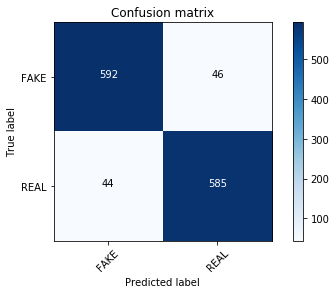

In [27]:
# confusion matrics for linear model
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Using best performing classifier with dataset (tfidf_vectorizer) and Passive Aggressive classifier (linear_clf), inspect the top 30 vectors for fake and real news.

# Introspecting models and using multinomialNB

In [28]:
#Introspecting models
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.592942957462277 2016
FAKE -5.078935701565768 october
FAKE -3.5513391701279127 share
FAKE -3.246086109214782 hillary
FAKE -3.1903205759627857 article
FAKE -3.1375809700348865 november
FAKE -2.9811541584504133 election
FAKE -2.7851659418299035 establishment
FAKE -2.717330651604084 mosul
FAKE -2.592368644133636 print
FAKE -2.4422114247458584 advertisement
FAKE -2.320430325483235 source
FAKE -2.237399717257586 snip
FAKE -2.1781983207899644 podesta
FAKE -2.085348536277925 28
FAKE -2.058769713888927 oct
FAKE -2.026551515440552 fbi
FAKE -2.0096363540402713 daesh
FAKE -1.9868768487377666 com
FAKE -1.8698357049481384 corporate
FAKE -1.7809458045065922 entire
FAKE -1.7779823099126963 pay
FAKE -1.7579517472242134 watch
FAKE -1.7403089233889424 donald
FAKE -1.7278236229001889 demand
FAKE -1.7262644448638074 russia
FAKE -1.7199275474225517 just
FAKE -1.718465966586481 following
FAKE -1.7120033600324627 wikileaks
FAKE -1.7045548378322901 ayotte

REAL 4.627212596127295 said
REAL 3.17012120196

# Features of the most real and most fake news.

In [29]:
feature_names = tfidf_vectorizer.get_feature_names()

In [33]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

accuracy:   0.841
Confusion matrix, without normalization


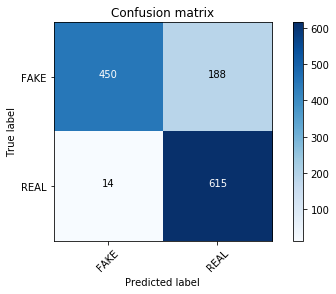

In [35]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
### Most real
Most_real=sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

In [37]:
Most_real

[(-6.22197530470591, 'trump'),
 (-6.497605805346871, 'said'),
 (-6.662531647877456, 'clinton'),
 (-7.065781869598758, 'obama'),
 (-7.207972756158055, 'sanders'),
 (-7.234925782550284, 'campaign'),
 (-7.237003111086504, 'president'),
 (-7.296593811053582, 'cruz'),
 (-7.299197619519782, 'republican'),
 (-7.313393428647016, 'state'),
 (-7.376070618026606, 'party'),
 (-7.446157097593646, 'new'),
 (-7.466916525204573, 'people'),
 (-7.536327320592957, 'percent'),
 (-7.576615375894985, 'house'),
 (-7.576982067110062, 'bush'),
 (-7.600976150807376, 'republicans'),
 (-7.642637838589939, 'voters'),
 (-7.657194719107827, 'rubio'),
 (-7.684400401187373, 'states')]

In [38]:
### Most fake
Most_fake=sorted(zip(clf.coef_[0], feature_names))[:20]

In [39]:
Most_fake

[(-11.433854969152721, '000035'),
 (-11.433854969152721, '0001'),
 (-11.433854969152721, '0001pt'),
 (-11.433854969152721, '0002'),
 (-11.433854969152721, '000billion'),
 (-11.433854969152721, '0011'),
 (-11.433854969152721, '004s'),
 (-11.433854969152721, '005'),
 (-11.433854969152721, '005s'),
 (-11.433854969152721, '00684'),
 (-11.433854969152721, '006s'),
 (-11.433854969152721, '007'),
 (-11.433854969152721, '007s'),
 (-11.433854969152721, '008s'),
 (-11.433854969152721, '0099'),
 (-11.433854969152721, '00am'),
 (-11.433854969152721, '00p'),
 (-11.433854969152721, '00pm'),
 (-11.433854969152721, '013c2812c9'),
 (-11.433854969152721, '014')]

# Here the model shows the accuracy of 92%. There are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment). Also, the real news data uses forms of the verb "to say" more often, likely because in newspapers and most journalistic publications sources are quoted directly ("German Chancellor Angela Merkel said...").